<ipython-input-3-39ead4a91d92>:12: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_signal, sampling_rate = librosa.load(file_path, sr=None)


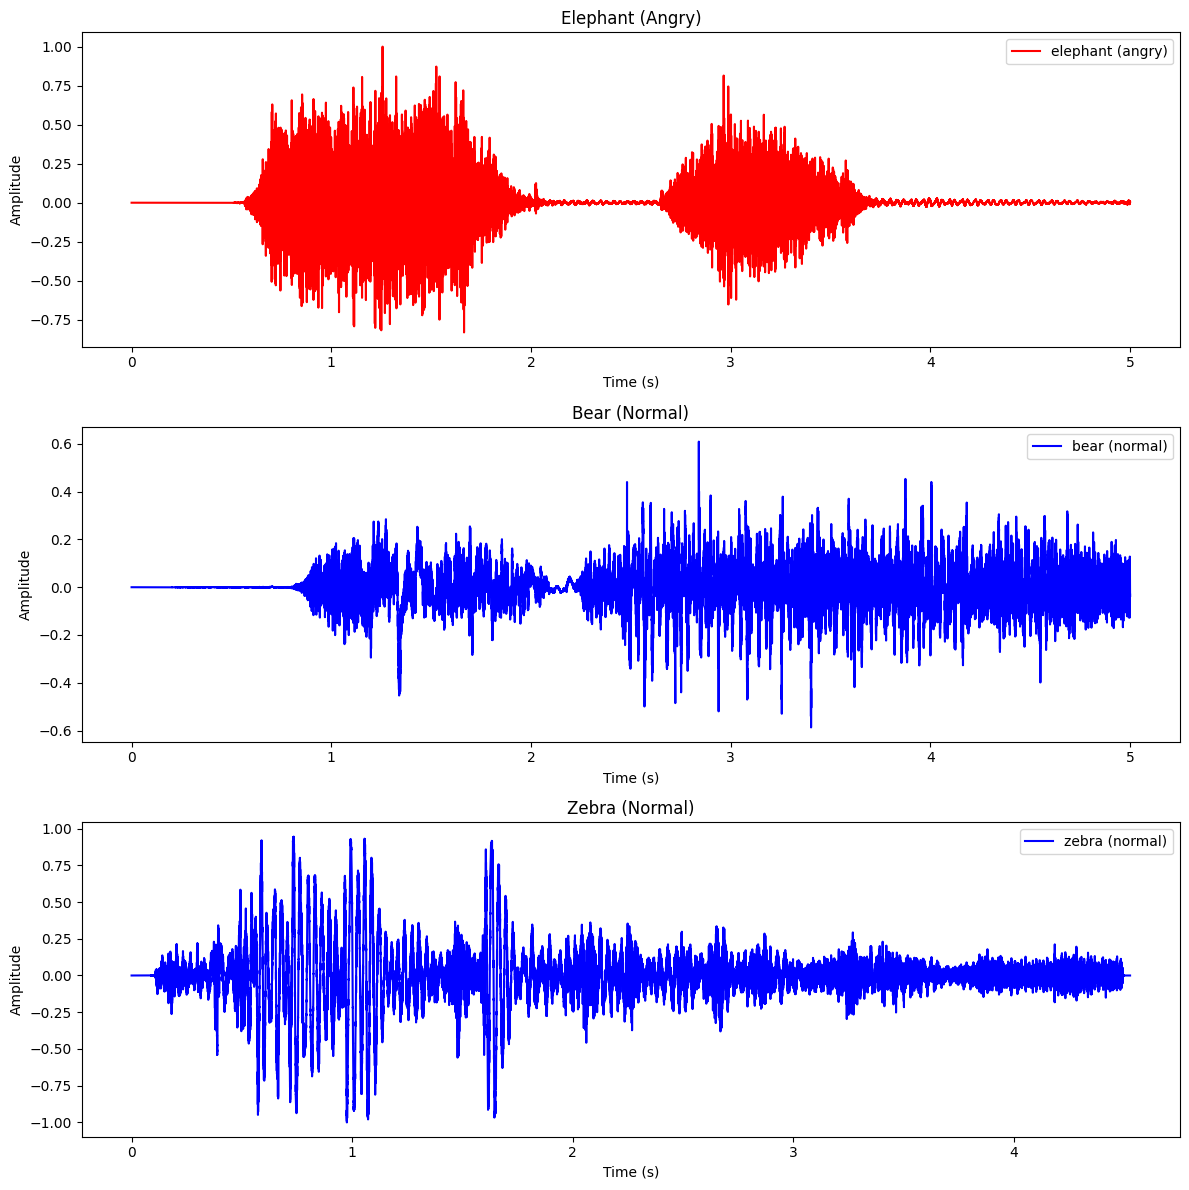

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Function to normalize the audio signal
def normalize_audio(signal):
    return signal / np.max(np.abs(signal))

# Function to read and normalize audio files
def read_and_normalize_audio(file_path):
    audio_signal, sampling_rate = librosa.load(file_path, sr=None)
    audio_signal = normalize_audio(audio_signal)
    return sampling_rate, audio_signal

# Define file paths for different animals and their emotions
animal_sounds = {
    "elephant_angry": "/content/angry_elephant.mp3",
    "bear": "/content/bear-voice.mp3",
    "zebra": "/content/Zebra Noise .mp4"

}

# Read and normalize all audio files
audio_data = {}
for label, file_path in animal_sounds.items():
    sampling_rate, audio_signal = read_and_normalize_audio(file_path)
    audio_data[label] = (sampling_rate, audio_signal)

# Define the duration you want to visualize (e.g., 5 seconds)
duration = 5  # in seconds

# Number of plots (one for each file)
num_plots = len(audio_data)

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(12, num_plots * 4))

# Define colors for different emotions
emotion_colors = {
    "angry": "red",
    "normal": "blue"
}

# Plot the audio signals
for i, (label, (sampling_rate, audio_signal)) in enumerate(audio_data.items()):
    num_samples = int(duration * sampling_rate)
    num_samples = min(num_samples, len(audio_signal))
    audio_signal = audio_signal[:num_samples]
    time_axis = np.arange(0, len(audio_signal)) / float(sampling_rate)
    emotion = "angry" if "angry" in label else "normal"
    animal = label.split('_')[0]

    # Plot on the corresponding subplot
    axes[i].plot(time_axis, audio_signal, color=emotion_colors[emotion], label=f"{animal} ({emotion})")
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Amplitude")
    axes[i].set_title(f"{animal.capitalize()} ({emotion.capitalize()})")
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()